In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.size'] = 7
plt.rcParams['font.family'] = 'Arial'


annotations = pd.read_csv('../data_tables/ergosterol_annotations.tsv',sep = '\t', index_col='var_id')
gxe = pd.read_csv('../data_tables/ergosterol_pathway_gxe_interactions.tsv', sep = '\t')
var_fits = pd.read_csv('../data_tables/Fitness_files/ergosterol_pathway_fitness.tsv', sep = '\t')
annotated_gxe = gxe.merge(annotations,'inner','var_id')
annotated_fits = var_fits.merge(annotations,'inner','var_id')

In [10]:
def get_GxE_vars(annotated_gxe_df, annotated_fitness_df):
    '''This code generates the list of GxE variants based on our stringent two-part definition:
    1) the variant has a GxE term with FDR<0.01, and 2) for that term, the direction
    of effect in the two conditions is in opposite directions.
    inputs:
        annotated_gxe_df (pandas DataFrame): table containing pairwise GxE coefficients and pvalues for variants,
        annotated by genomic location.
        annotated_fitness_df (pandas DataFrame):  table containing fitness values for variants in 
        all relevant conditions,annotated by genomic location.
    returns:
        gxe_vars (list of strings): list of variants which show GxE according to our definition 
        (not unique, many represented multiple times) 
    '''
    gxe_vars =[] 
    for i, row in annotated_gxe_df[(annotated_gxe_df['padj']<0.01)].iterrows():
        var = row['var_id']
        conds = row['gxe'].split('-')
        if annotated_fitness_df[(annotated_fitness_df['var_id']==var)&\
                                (annotated_fitness_df['condition'].isin(conds))]['coef'].prod()<0:
            gxe_vars.append(var)
    return gxe_vars

In [11]:
annotated_fits_min = annotated_fits
annotated_fits_min['num_conds'] = annotated_fits_min.groupby('var_id')['coef'].transform('size')
fitness_hit_in_one_cond = annotated_fits_min[(annotated_fits_min['num_conds']==6)&(annotated_fits_min['padj']<.01)]['var_id'].unique()

gxe_vars = get_GxE_vars(annotated_gxe,annotated_fits)

not_gxe =set(hit_in_one_cond)-set(gxe_vars)
print('Frac GxE: '+str(round(1-len(not_gxe)/len(fitness_hit_in_one_cond),4))) 
real_frac_gxe = 1-len(not_gxe)/len(fitness_hit_in_one_cond)

Frac GxE: 0.9366


In [21]:
frac_gxe = []
for c1 in annotated_fits['condition'].unique():
    print(c1)

    annotated_fits_min = annotated_fits[~annotated_fits['condition'].isin([c1])]
    annotated_fits_min['num_conds'] = annotated_fits_min.groupby('var_id')['coef'].transform('size')
    fitness_hit_in_one_cond = annotated_fits_min[(annotated_fits_min['num_conds']==5)&(annotated_fits_min['padj']<.01)]['var_id'].unique()
    dropout_gxe = annotated_gxe[(~annotated_gxe['gxe'].str.contains(c1))]
    gxe_vars_dropout = get_GxE_vars(dropout_gxe,annotated_fits_min)
    not_gxe =set(fitness_hit_in_one_cond)-set(gxe_vars_dropout)
    
    print('Condition excluded: '+c1)
    print('Frac GxE: '+str(round(1-len(not_gxe)/len(fitness_hit_in_one_cond),4))) 
    frac_gxe.append(1-len(not_gxe)/len(fitness_hit_in_one_cond))

CAFF
Condition excluded: CAFF
Frac GxE: 0.7475
COCL
Condition excluded: COCL
Frac GxE: 0.9023
LOV
Condition excluded: LOV
Frac GxE: 0.8926
NACL
Condition excluded: NACL
Frac GxE: 0.9175
SC
Condition excluded: SC
Frac GxE: 0.8984
TBF
Condition excluded: TBF
Frac GxE: 0.9091


In [22]:
cond_pairs_tested= []
frac_gxe_2 = []
for c1 in annotated_fits['condition'].unique():
    for c2 in annotated_fits['condition'].unique():
        if c1!=c2:
            if set([c1,c2]) not in cond_pairs_tested:
                cond_pairs_tested.append(set([c1,c2]))
                annotated_fits_min = annotated_fits[~annotated_fits['condition'].isin([c1,c2])]
                annotated_fits_min['num_conds'] = annotated_fits_min.groupby('var_id')['coef'].transform('size')
                fitness_hit_in_one_cond = annotated_fits_min[(annotated_fits_min['num_conds']==4)&(annotated_fits_min['padj']<.01)]['var_id'].unique()
                dropout_gxe = annotated_gxe[(~annotated_gxe['gxe'].str.contains(c1))\
                                           &(~annotated_gxe['gxe'].str.contains(c2))]
                gxe_vars_dropout = get_GxE_vars(dropout_gxe,annotated_fits_min)
                
                not_gxe =set(fitness_hit_in_one_cond)-set(gxe_vars_dropout)
                print('Conditions excluded: '+c1+','+c2)
                frac_gxe_2.append(1-len(not_gxe)/len(fitness_hit_in_one_cond))
                print('Frac GxE: '+str(round(1-len(not_gxe)/len(fitness_hit_in_one_cond),4)))   

Conditions excluded: CAFF,COCL
Frac GxE: 0.6407
Conditions excluded: CAFF,LOV
Frac GxE: 0.6259
Conditions excluded: CAFF,NACL
Frac GxE: 0.6613
Conditions excluded: CAFF,SC
Frac GxE: 0.7216
Conditions excluded: CAFF,TBF
Frac GxE: 0.6722
Conditions excluded: COCL,LOV
Frac GxE: 0.8224
Conditions excluded: COCL,NACL
Frac GxE: 0.8765
Conditions excluded: COCL,SC
Frac GxE: 0.8289
Conditions excluded: COCL,TBF
Frac GxE: 0.8581
Conditions excluded: LOV,NACL
Frac GxE: 0.8333
Conditions excluded: LOV,SC
Frac GxE: 0.8295
Conditions excluded: LOV,TBF
Frac GxE: 0.8819
Conditions excluded: NACL,SC
Frac GxE: 0.8636
Conditions excluded: NACL,TBF
Frac GxE: 0.875
Conditions excluded: SC,TBF
Frac GxE: 0.8024


In [25]:
cond_pairs_tested= []
frac_gxe_3 = []
for c1 in annotated_fits['condition'].unique():
    for c2 in annotated_fits['condition'].unique():
         for c3 in annotated_fits['condition'].unique():
            if c1!=c2 and c2!=c3 and c1!=c3:
                if set([c1,c2,c3]) not in cond_pairs_tested:
                    cond_pairs_tested.append(set([c1,c2,c3]))
                    annotated_fits_min = annotated_fits[~annotated_fits['condition'].isin([c1,c2,c3])]
                    annotated_fits_min['num_conds'] = annotated_fits_min.groupby('var_id')['coef'].transform('size')
                    fitness_hit_in_one_cond = annotated_fits_min[(annotated_fits_min['num_conds']==3)&(annotated_fits_min['padj']<.01)]['var_id'].unique()
                    dropout_gxe = annotated_gxe[(~annotated_gxe['gxe'].str.contains(c1))\
                                             &(~annotated_gxe['gxe'].str.contains(c2))\
                                             &(~annotated_gxe['gxe'].str.contains(c3))]
                    gxe_vars_dropout = get_GxE_vars(dropout_gxe,annotated_fits_min)

                    not_gxe =set(fitness_hit_in_one_cond)-set(gxe_vars_dropout)
                    print('Conditions excluded: '+c1+','+c2+','+c3)
                    frac_gxe_3.append(1-len(not_gxe)/len(fitness_hit_in_one_cond))
                    print('Frac GxE: '+str(round(1-len(not_gxe)/len(fitness_hit_in_one_cond),4)))   

Conditions excluded: CAFF,COCL,LOV
Frac GxE: 0.4433
Conditions excluded: CAFF,COCL,NACL
Frac GxE: 0.513
Conditions excluded: CAFF,COCL,SC
Frac GxE: 0.5217
Conditions excluded: CAFF,COCL,TBF
Frac GxE: 0.5286
Conditions excluded: CAFF,LOV,NACL
Frac GxE: 0.4921
Conditions excluded: CAFF,LOV,SC
Frac GxE: 0.5965
Conditions excluded: CAFF,LOV,TBF
Frac GxE: 0.5345
Conditions excluded: CAFF,NACL,SC
Frac GxE: 0.6037
Conditions excluded: CAFF,NACL,TBF
Frac GxE: 0.5629
Conditions excluded: CAFF,SC,TBF
Frac GxE: 0.5833
Conditions excluded: COCL,LOV,NACL
Frac GxE: 0.7553
Conditions excluded: COCL,LOV,SC
Frac GxE: 0.679
Conditions excluded: COCL,LOV,TBF
Frac GxE: 0.7867
Conditions excluded: COCL,NACL,SC
Frac GxE: 0.7929
Conditions excluded: COCL,NACL,TBF
Frac GxE: 0.8235
Conditions excluded: COCL,SC,TBF
Frac GxE: 0.6774
Conditions excluded: LOV,NACL,SC
Frac GxE: 0.7288
Conditions excluded: LOV,NACL,TBF
Frac GxE: 0.7692
Conditions excluded: LOV,SC,TBF
Frac GxE: 0.7143
Conditions excluded: NACL,SC,TBF

In [26]:
cond_pairs_tested= []
frac_gxe_4= []
for c1 in annotated_fits['condition'].unique():
    for c2 in annotated_fits['condition'].unique():
        if c1!=c2:
            if set([c1,c2]) not in cond_pairs_tested:
                cond_pairs_tested.append(set([c1,c2]))
                annotated_fits_min = annotated_fits[annotated_fits['condition'].isin([c1,c2])]
                annotated_fits_min['num_conds'] = annotated_fits_min.groupby('var_id')['coef'].transform('size')
                fitness_hit_in_one_cond = annotated_fits_min[(annotated_fits_min['num_conds']==2)&(annotated_fits_min['padj']<.01)]['var_id'].unique()
                annotated_fits_min['signchange'] = annotated_fits_min.groupby('var_id')['coef'].transform(sign_change_checker)
                dropout_gxe = annotated_gxe[(annotated_gxe['gxe'].str.contains(c1))\
                                           &(annotated_gxe['gxe'].str.contains(c2))]

                gxe_vars_dropout = get_GxE_vars(dropout_gxe,annotated_fits_min)
                not_gxe =set(fitness_hit_in_one_cond)-set(gxe_vars_dropout)
                print('Conditions excluded: '+c1+','+c2)
                frac_gxe_4.append(1-len(not_gxe)/len(fitness_hit_in_one_cond))
                print('Frac GxE: '+str(round(1-len(not_gxe)/len(fitness_hit_in_one_cond),4)))   

Conditions excluded: CAFF,COCL
Frac GxE: 0.4
Conditions excluded: CAFF,LOV
Frac GxE: 0.5766
Conditions excluded: CAFF,NACL
Frac GxE: 0.4043
Conditions excluded: CAFF,SC
Frac GxE: 0.7143
Conditions excluded: CAFF,TBF
Frac GxE: 0.5821
Conditions excluded: COCL,LOV
Frac GxE: 0.4196
Conditions excluded: COCL,NACL
Frac GxE: 0.4659
Conditions excluded: COCL,SC
Frac GxE: 0.2816
Conditions excluded: COCL,TBF
Frac GxE: 0.4059
Conditions excluded: LOV,NACL
Frac GxE: 0.2963
Conditions excluded: LOV,SC
Frac GxE: 0.381
Conditions excluded: LOV,TBF
Frac GxE: 0.336
Conditions excluded: NACL,SC
Frac GxE: 0.2742
Conditions excluded: NACL,TBF
Frac GxE: 0.3016
Conditions excluded: SC,TBF
Frac GxE: 0.2439


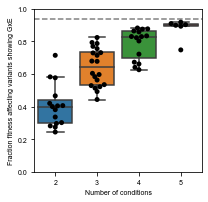

In [28]:
plt.subplots(figsize = (3,3))
sns.swarmplot(data = [frac_gxe,frac_gxe_2,frac_gxe_3,frac_gxe_4][::-1], color = 'black')
sns.boxplot(data = [frac_gxe,frac_gxe_2,frac_gxe_3,frac_gxe_4][::-1], fliersize = 0)
plt.xticks([0,1,2,3],[2,3,4,5])
plt.axhline(0.9365853658536585, linestyle = 'dashed', color = 'grey')
plt.ylim(0,1)
plt.xlabel('Number of conditions')
plt.ylabel('Fraction fitness affecting variants showing GxE')
plt.savefig('../GxE_Figures/Figure_S6.svg')